### Visualizing categorical data

* In the `relational plot` tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset.
* we focused on cases where the main relationship was between two numerical variables.
* If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'Name':['Raju','Rani','Santhu','Kalayan','Depakia'],
                    'Gender':['Male','FeMale','Male','Male','FeMale'],
                   'Age':[25,35,30,25,30]
                  })
df

,Name,Gender,Age
0,Raju,Male,25
1,Rani,FeMale,35
2,Santhu,Male,30
3,Kalayan,Male,25
4,Depakia,FeMale,30


In [3]:
df.Gender.value_counts()

Male      3
FeMale    2
Name: Gender, dtype: int64

* There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface,` catplot()`, that gives unified higher-level access to them.")

#### Categorical scatterplots:
* The default representation of the data in catplot() uses a scatterplot.
* There are actually two different categorical scatter plots in seaborn.
* The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:
* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

In [4]:
tips = pd.read_csv("Datasets/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


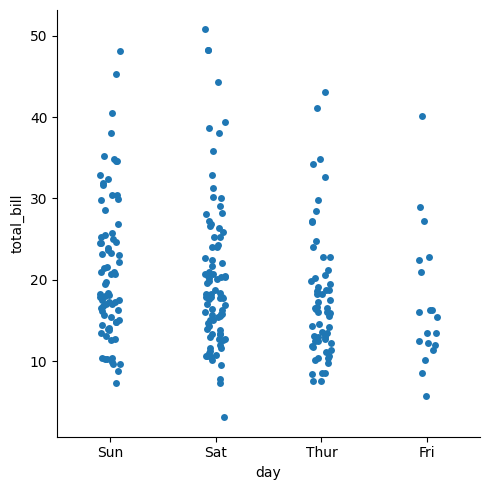

In [5]:
sns.catplot(tips,x='day',y='total_bill')

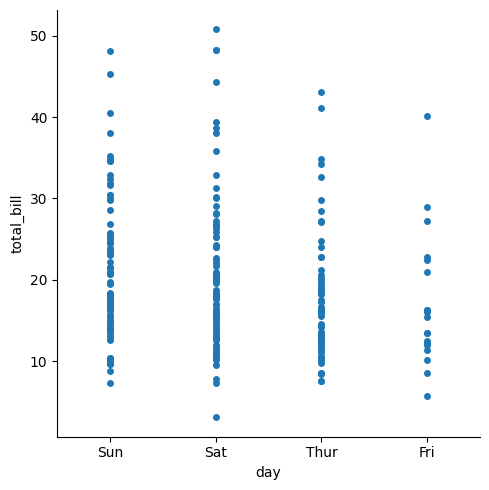

In [6]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

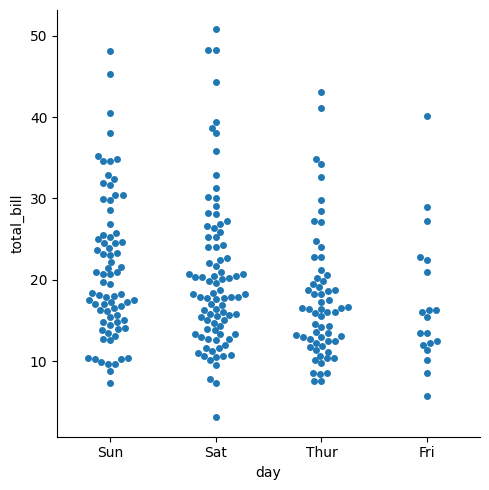

In [7]:
sns.catplot(data=tips, x="day", y="total_bill", kind='swarm')

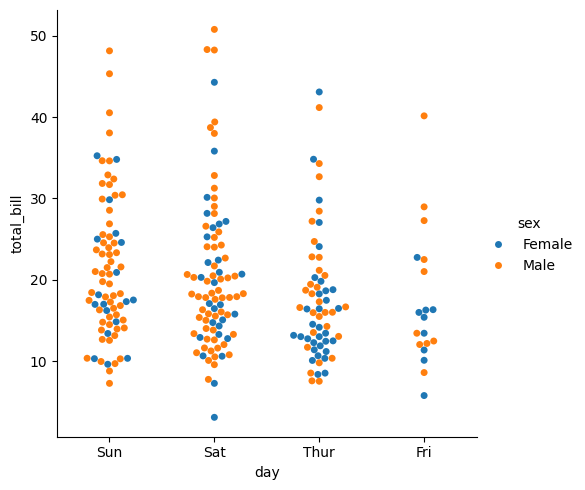

In [8]:
sns.catplot(data=tips, x="day", y="total_bill", kind='swarm',hue='sex')

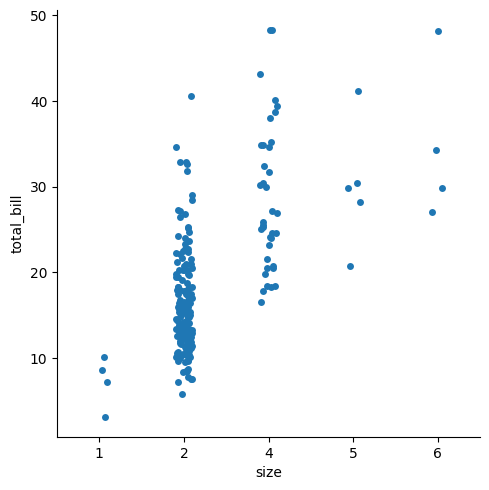

In [9]:
sns.catplot(data=tips.query("size!=3"),x='size',y='total_bill')

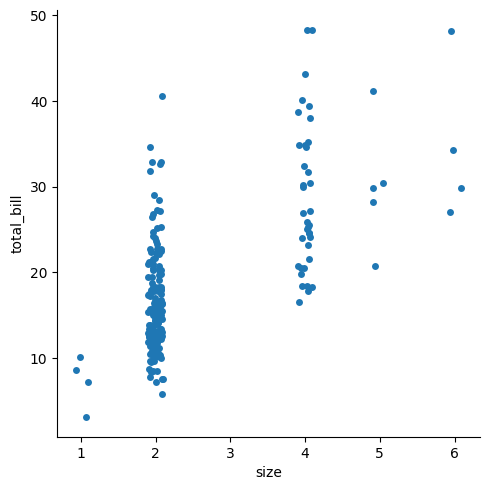

In [10]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

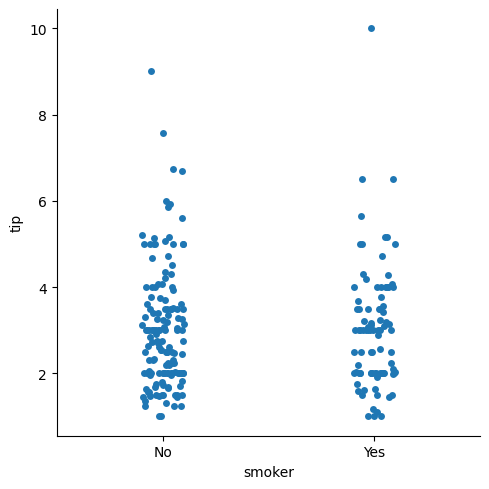

In [11]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

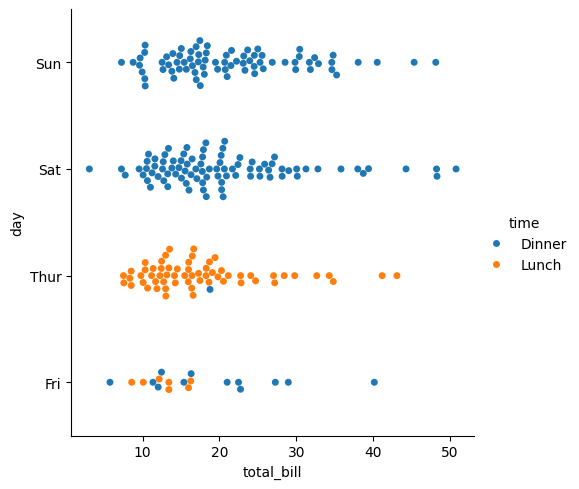

In [12]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

#### Comparing distributions

* As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category.
* When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

<ul class="simple">
<li><p><a class="reference internal" href="../generated/seaborn.boxplot.html#seaborn.boxplot" title="seaborn.boxplot"><code class="xref py py-func docutils literal notranslate"><span class="pre">boxplot()</span></code></a> (with <code class="docutils literal notranslate"><span class="pre">kind="box"</span></code>)</p></li>
<li><p><a class="reference internal" href="../generated/seaborn.violinplot.html#seaborn.violinplot" title="seaborn.violinplot"><code class="xref py py-func docutils literal notranslate"><span class="pre">violinplot()</span></code></a> (with <code class="docutils literal notranslate"><span class="pre">kind="violin"</span></code>)</p></li>
<li><p><a class="reference internal" href="../generated/seaborn.boxenplot.html#seaborn.boxenplot" title="seaborn.boxenplot"><code class="xref py py-func docutils literal notranslate"><span class="pre">boxenplot()</span></code></a> (with <code class="docutils literal notranslate"><span class="pre">kind="boxen"</span></code>)</p></li>
</ul>

##### Boxplots

![](https://media.labxchange.org/xblocks/lb-LabXchange-d8863c77-html-1/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png)

* The first is the familiar `boxplot()`.
* This kind of plot shows the three quartile values of the distribution along with extreme values.
* The `whiskers` extend to points that lie within `1.5 IQRs` of the lower and upper quartile, and then observations that fall outside this range are displayed independently.
* This means that each value in the boxplot corresponds to an actual observation in the data.

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.total_bill.min()

3.07

In [15]:
tips.total_bill.max()

50.81

![](https://cdn-images-1.medium.com/v2/resize:fit:913/1*8B-aH0iL9VYwzCUBXbCrUQ.png)

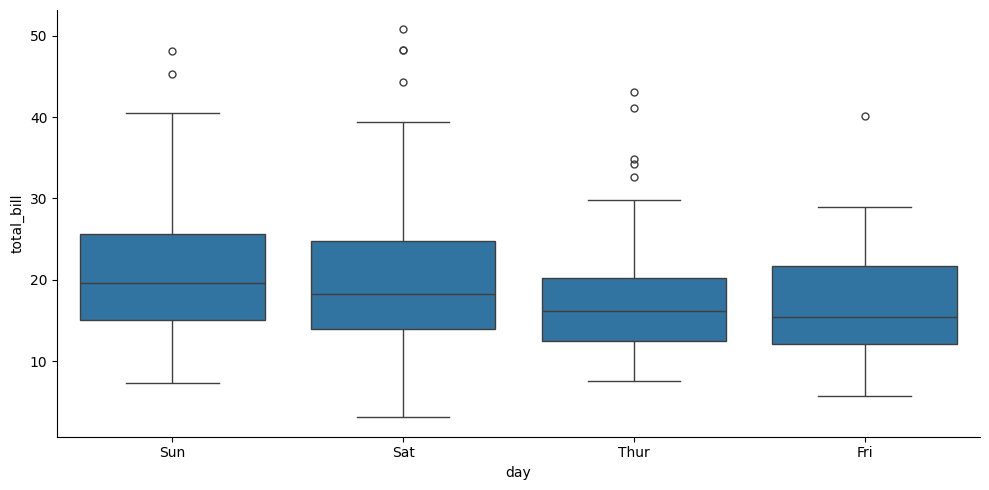

In [23]:
sns.catplot(data=tips,x='day',y='total_bill',kind='box',aspect=2)

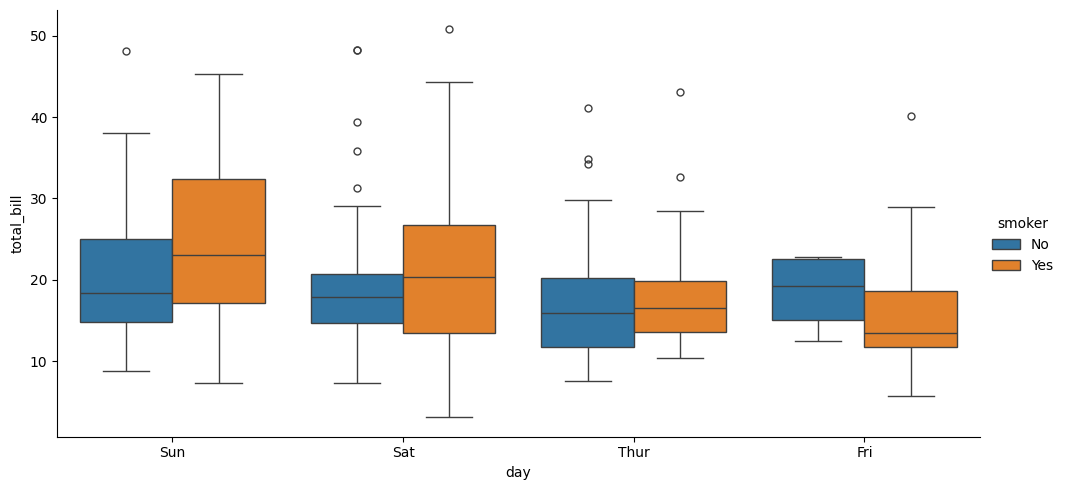

In [25]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box",aspect=2)

In [27]:
tips['weekend'] = tips['day'].isin(['Sat','Sun'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


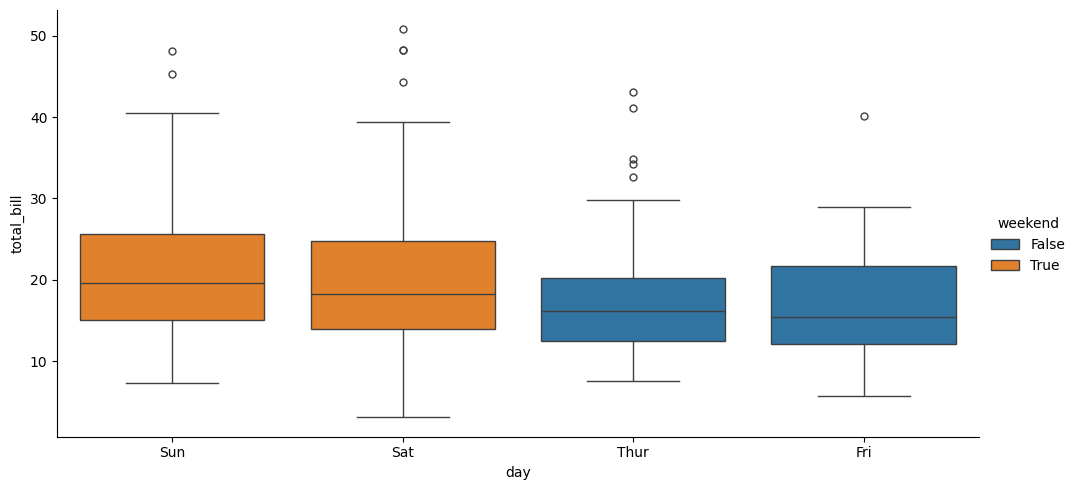

In [30]:
sns.catplot(data=tips,x='day',y='total_bill',hue='weekend',kind='box',aspect=2)

In [32]:
diamonds = pd.read_csv("Datasets/diamonds.csv")

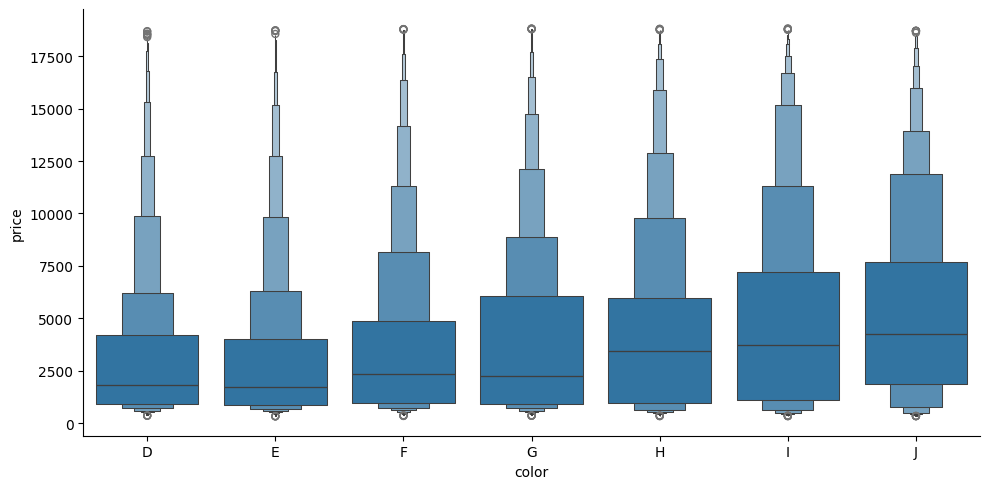

In [33]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",aspect=2
)

##### Violinplots

![](https://media.labxchange.org/xblocks/lb-LabXchange-46f64d7a-html-1/28__violin-plot-11626365603605-77f9e7acf0e79c553ec92a044b91b6b1.png)
* A different approach is a violinplot(), which combines a boxplot with the `kernel density estimation` procedure described in the distributions tutorial

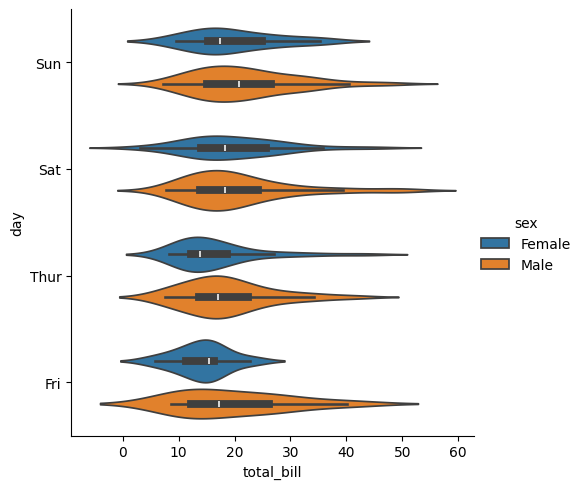

In [38]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",aspect=1
)

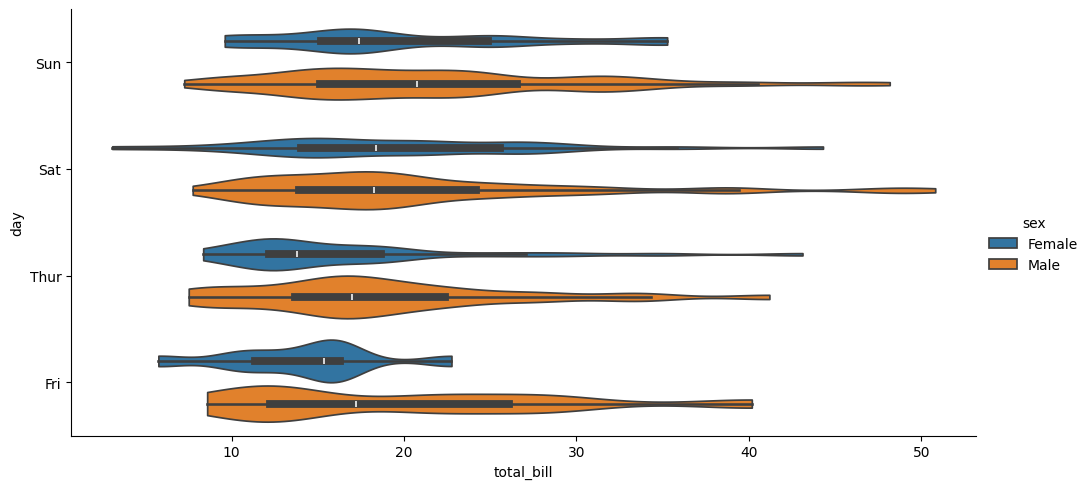

In [39]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,aspect=2
)

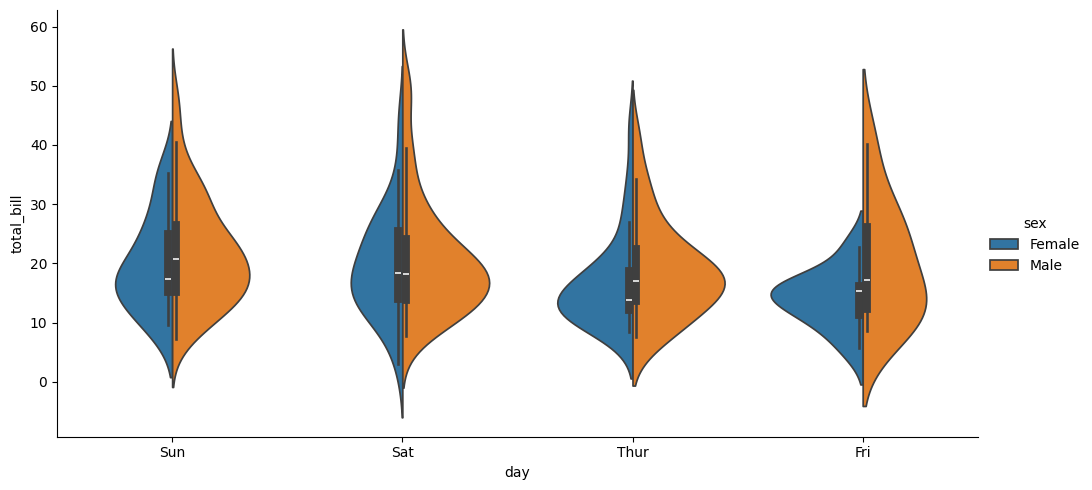

In [41]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",aspect=2,
    kind="violin", split=True,
)

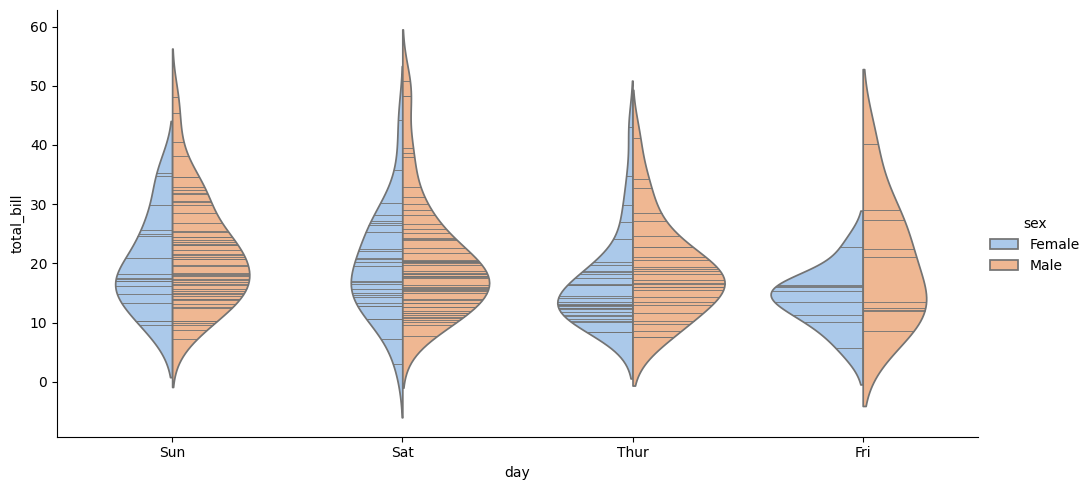

In [43]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",aspect=2,
    kind="violin", inner="stick", split=True, palette="pastel",
)

<Axes: xlabel='day', ylabel='total_bill'>

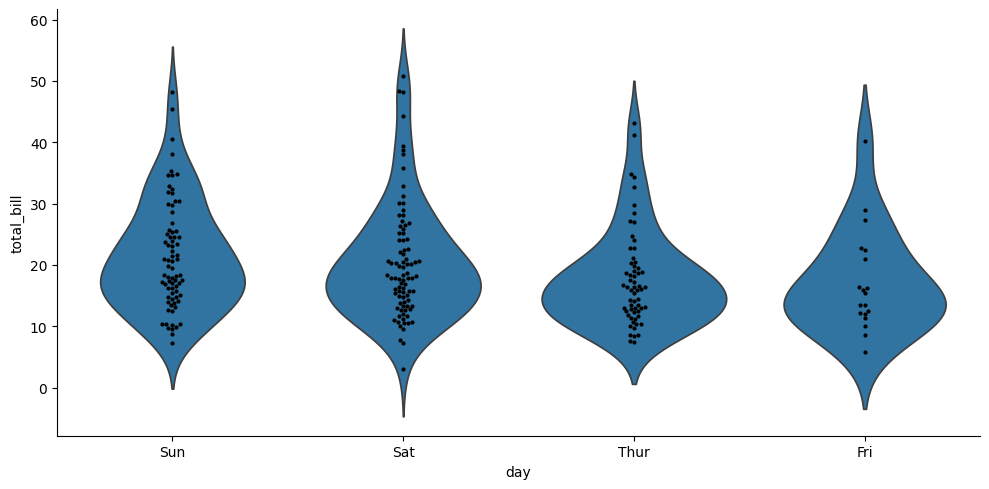

In [44]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None,aspect=2)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

#### Estimating central tendency

![](https://ledidi.com/uploads/icons/median-mode-mean-central-dendency-ledidi-academy.png)

* For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values.
* Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

In [45]:
titanic = pd.read_csv("Datasets/titanic.csv")
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [47]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

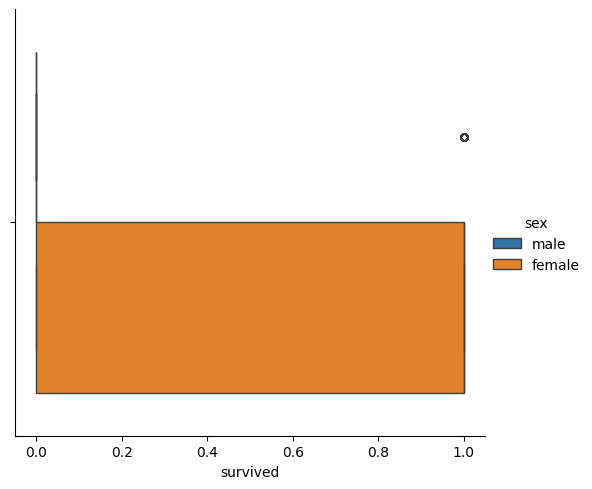

In [50]:
sns.catplot(titanic,x='',kind='box',hue='sex')

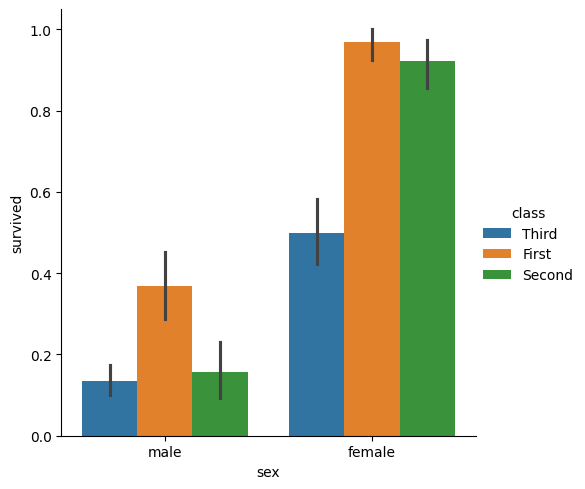

In [51]:
sns.catplot(titanic,x='sex',y='survived',kind='bar',hue='class')

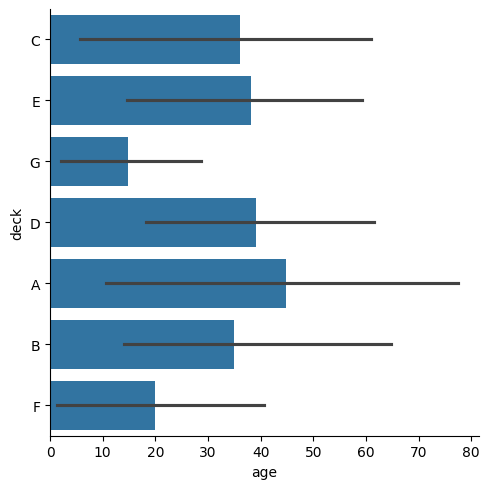

In [52]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

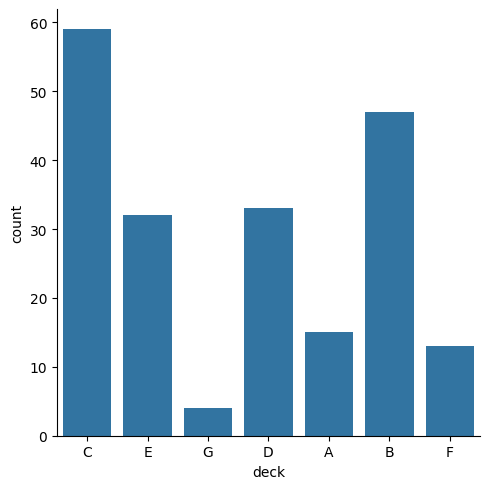

In [53]:
sns.catplot(data=titanic, x="deck", kind="count")

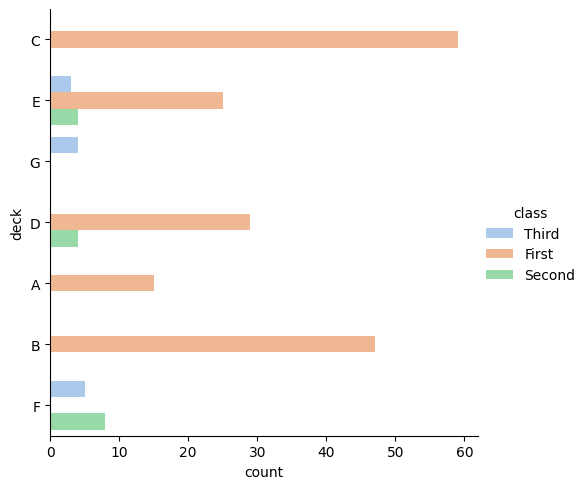

In [54]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

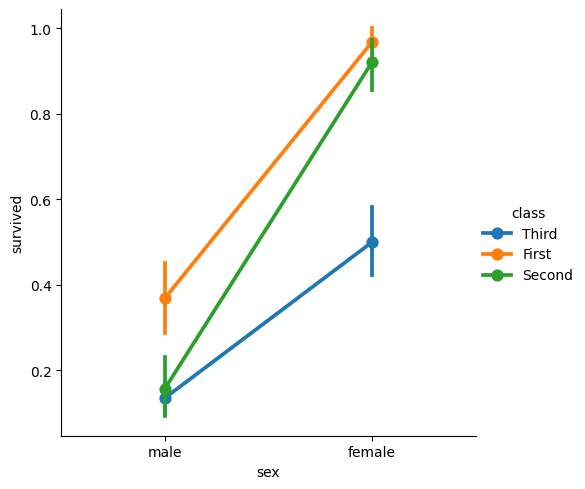

In [56]:
sns.catplot(data=titanic, x="sex", y="survived",hue='class',kind='point')

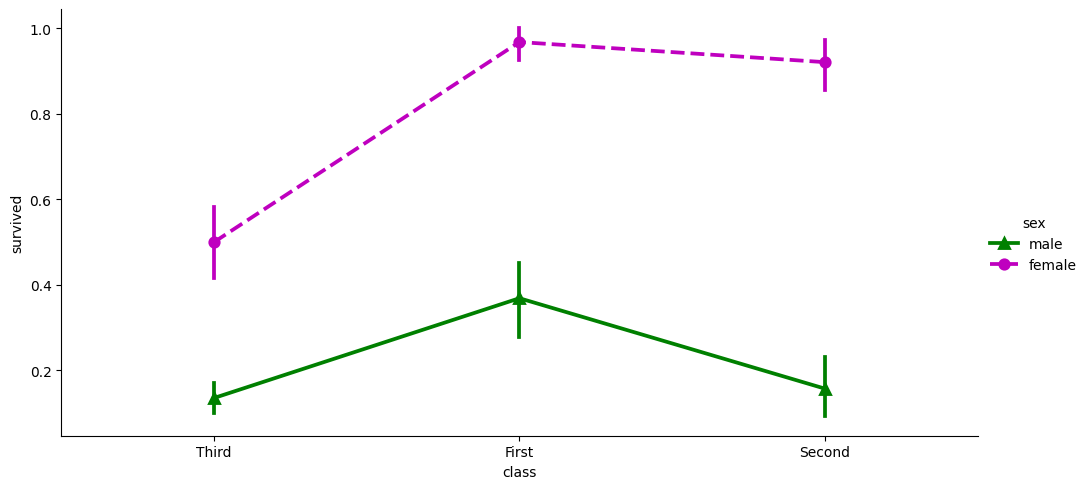

In [58]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point",aspect=2
)

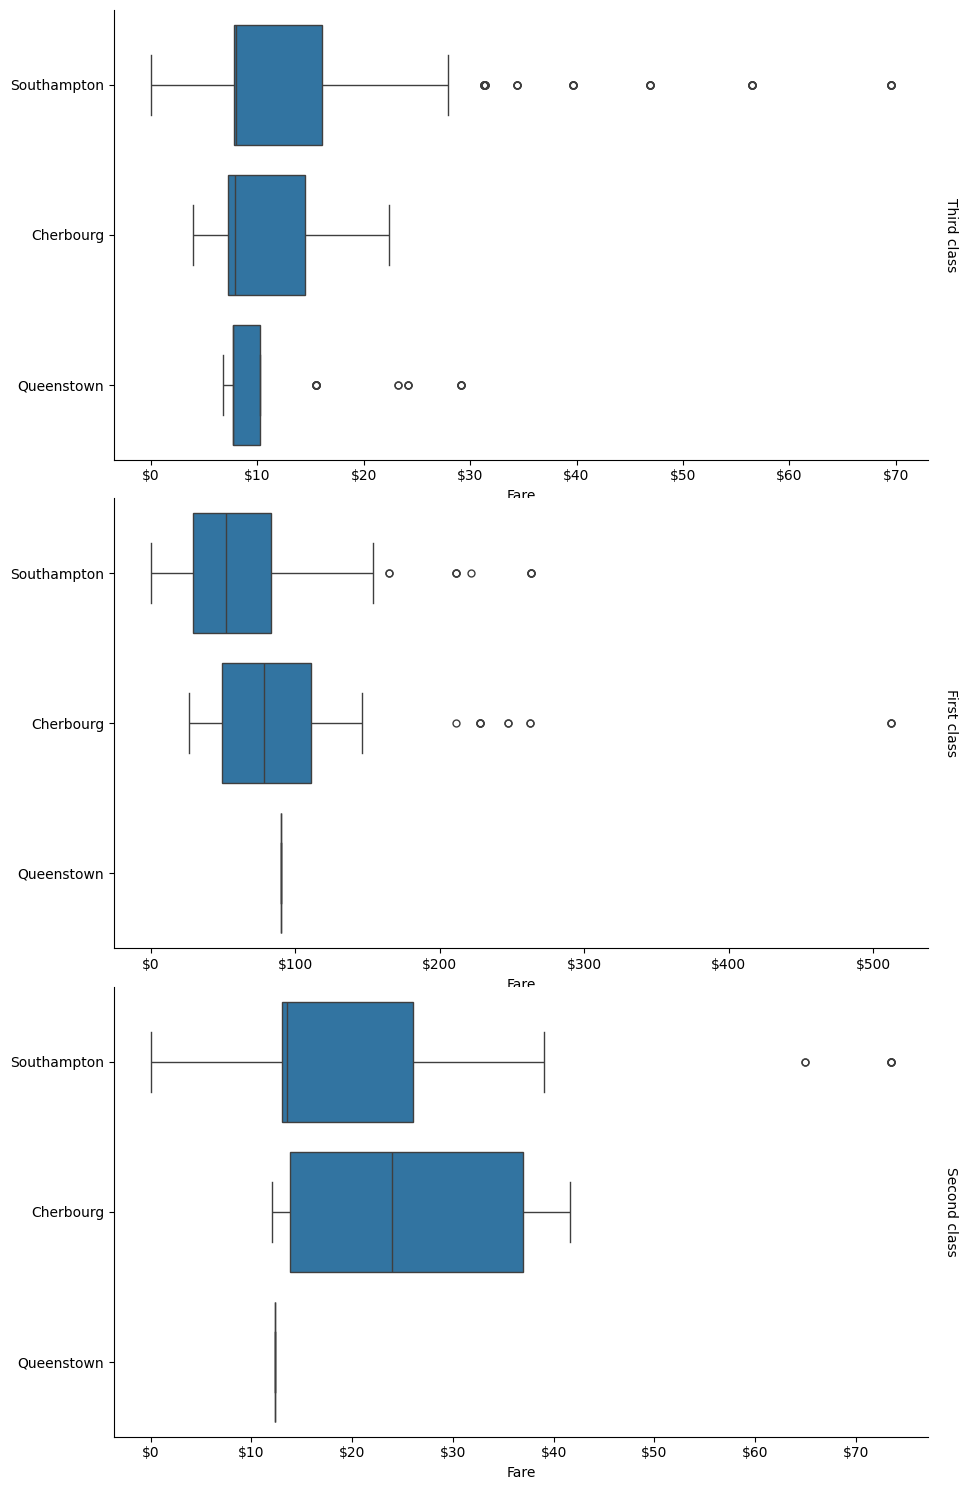

In [61]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    aspect=2,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')